In [24]:
import pandas as pd

# Charger les fichiers CSV
tesla_data = pd.read_csv("/content/data/tesla_data.csv")
gamestop_data = pd.read_csv("/content/data/gamestop_data.csv")

# Vérifier les noms de colonnes avant correction
print("Colonnes Tesla avant correction:", tesla_data.columns)
print("Colonnes GameStop avant correction:", gamestop_data.columns)

# Renommer l'index en "Date" si nécessaire
if "Date" not in tesla_data.columns:
    tesla_data.rename(columns={"index": "Date"}, inplace=True)
if "Date" not in gamestop_data.columns:
    gamestop_data.rename(columns={"index": "Date"}, inplace=True)

# Vérifier les colonnes après correction
print("Colonnes Tesla après correction:", tesla_data.columns)
print("Colonnes GameStop après correction:", gamestop_data.columns)

# Afficher les premières lignes
print("\nTesla Data:")
display(tesla_data.head())

print("\nGameStop Data:")
display(gamestop_data.head())

# Infos générales
print("\nTesla Info:")
tesla_data.info()

print("\nGameStop Info:")
gamestop_data.info()



Colonnes Tesla avant correction: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Colonnes GameStop avant correction: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Colonnes Tesla après correction: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Colonnes GameStop après correction: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

Tesla Data:


,Close,High,Low,Open,Volume
0,TSLA,TSLA,TSLA,TSLA,TSLA
1,28.68400001525879,28.713333129882812,28.11400032043457,28.299999237060547,142981500
2,29.534000396728516,30.266666412353516,29.128000259399414,29.366666793823242,266677500
3,30.1026668548584,30.104000091552734,29.333332061767578,29.364667892456055,151995000
4,31.270666122436523,31.441999435424805,30.224000930786133,30.760000228881836,268231500



GameStop Data:


,Close,High,Low,Open,Volume
0,GME,GME,GME,GME,GME
1,1.5774999856948853,1.6174999475479126,1.5175000429153442,1.534999966621399,17814400
2,1.4700000286102295,1.5625,1.4600000381469727,1.5525000095367432,14175600
3,1.462499976158142,1.4774999618530273,1.399999976158142,1.4500000476837158,13579200
4,1.3799999952316284,1.4574999809265137,1.3600000143051147,1.4424999952316284,20912000



Tesla Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1048 non-null   object
 1   High    1048 non-null   object
 2   Low     1048 non-null   object
 3   Open    1048 non-null   object
 4   Volume  1048 non-null   object
dtypes: object(5)
memory usage: 41.1+ KB

GameStop Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1048 non-null   object
 1   High    1048 non-null   object
 2   Low     1048 non-null   object
 3   Open    1048 non-null   object
 4   Volume  1048 non-null   object
dtypes: object(5)
memory usage: 41.1+ KB


In [25]:
import pandas as pd

# ✅ Supprimer les éventuelles en-têtes parasites dans la colonne "Close"
tesla_data = tesla_data[tesla_data["Close"] != "TSLA"]
gamestop_data = gamestop_data[gamestop_data["Close"] != "GME"]

# ✅ Vérifier les types de données avant conversion
print("\nTypes de données avant conversion :")
print(tesla_data.dtypes)
print(gamestop_data.dtypes)

# ✅ Convertir les colonnes en valeurs numériques
cols = ["Close", "High", "Low", "Open", "Volume"]

for col in cols:
    tesla_data[col] = pd.to_numeric(tesla_data[col], errors="coerce")
    gamestop_data[col] = pd.to_numeric(gamestop_data[col], errors="coerce")

# ✅ Vérifier les types après conversion
print("\nTypes de données après conversion :")
print(tesla_data.dtypes)
print(gamestop_data.dtypes)

# ✅ Supprimer les lignes avec des valeurs manquantes après conversion
tesla_data = tesla_data.dropna()
gamestop_data = gamestop_data.dropna()

# ✅ Statistiques descriptives
print("\nTesla Statistics:")
print(tesla_data.describe())

print("\nGameStop Statistics:")
print(gamestop_data.describe())

# ✅ Vérifier les valeurs manquantes
print("\nMissing values in Tesla Data:")
print(tesla_data.isnull().sum())

print("\nMissing values in GameStop Data:")
print(gamestop_data.isnull().sum())





Types de données avant conversion :
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

Types de données après conversion :
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

Tesla Statistics:
             Close         High          Low         Open        Volume
count  1047.000000  1047.000000  1047.000000  1047.000000  1.047000e+03
mean    208.954851   213.729324   203.950251   209.031519  1.321701e+08
std      84.187308    86.041027    82.417723    84.381961  8.711703e+07
min      24.081333    26.990667    23.367332    24.980000  2.940180e+07
25%     163.096672   167.105003   159.779999   163.985001  7.884875e+07
50%     221.720001   226.740005   216.763336   222.600006  1.068270e+

<ipython-input-25-d3f0cd1a457f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_data[col] = pd.to_numeric(tesla_data[col], errors="coerce")
<ipython-input-25-d3f0cd1a457f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamestop_data[col] = pd.to_numeric(gamestop_data[col], errors="coerce")


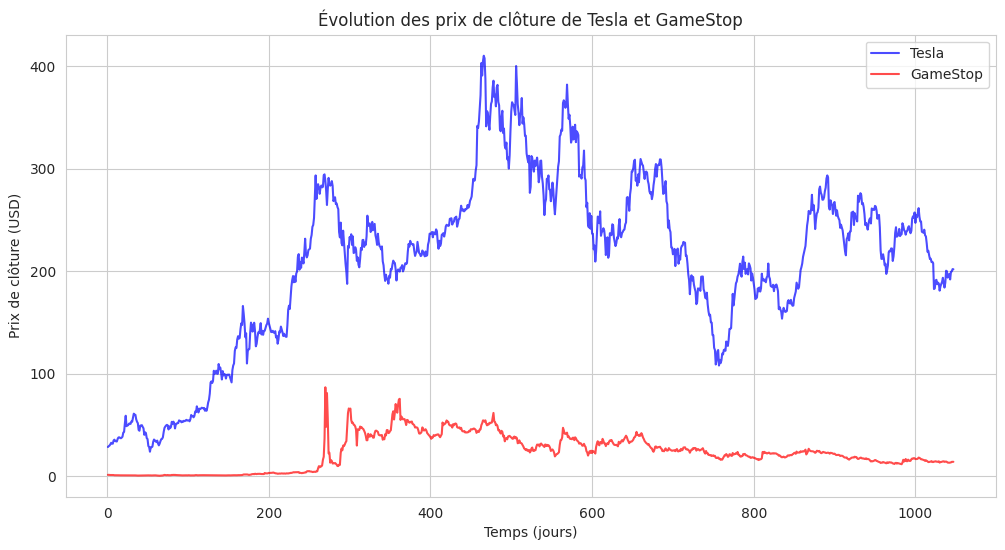

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Définition du style
sns.set_style("whitegrid")

# ✅ Tracer les prix de clôture (Close) sur le temps
plt.figure(figsize=(12, 6))
plt.plot(tesla_data["Close"], label="Tesla", color="blue", alpha=0.7)
plt.plot(gamestop_data["Close"], label="GameStop", color="red", alpha=0.7)
plt.title("Évolution des prix de clôture de Tesla et GameStop")
plt.xlabel("Temps (jours)")
plt.ylabel("Prix de clôture (USD)")
plt.legend()
plt.show()



In [28]:
# ✅ Calcul des rendements journaliers (Returns)
tesla_data["Returns"] = tesla_data["Close"].pct_change()
gamestop_data["Returns"] = gamestop_data["Close"].pct_change()

# ✅ Calcul de la volatilité sur une fenêtre de 30 jours
tesla_data["Volatility"] = tesla_data["Returns"].rolling(window=30).std()
gamestop_data["Volatility"] = gamestop_data["Returns"].rolling(window=30).std()

# ✅ Vérification des premières valeurs non-NaN de la volatilité
print("\nTesla - Volatility (first non-NaN values):")
print(tesla_data.dropna(subset=["Volatility"]).head())

print("\nGameStop - Volatility (first non-NaN values):")
print(gamestop_data.dropna(subset=["Volatility"]).head())

# ✅ Afficher les premières lignes avec Returns et Volatility
print("\nTesla Data - First Rows with Returns & Volatility:")
print(tesla_data.head())

print("\nGameStop Data - First Rows with Returns & Volatility:")
print(gamestop_data.head())




Tesla - Volatility (first non-NaN values):
        Close       High        Low       Open     Volume   Returns  \
31  53.335335  54.198002  52.366669  52.481335  235405500 -0.004938   
32  57.226665  57.333332  55.490665  56.106667  245725500  0.072960   
33  61.161331  62.985332  60.068001  61.566666  381345000  0.068756   
34  59.960667  60.799999  57.329334  60.796665  264523500 -0.019631   
35  60.066666  60.870667  58.696667  60.465332  214722000  0.001768   

    Volatility  
31    0.062237  
32    0.062902  
33    0.063415  
34    0.063899  
35    0.063838  

GameStop - Volatility (first non-NaN values):
     Close    High     Low    Open    Volume   Returns  Volatility
31  1.0050  1.0475  1.0050  1.0275   6330800 -0.021898    0.039670
32  1.0150  1.0200  0.9900  1.0025   5870400  0.009950    0.038550
33  1.0375  1.0675  0.9800  1.0150  10372400  0.022168    0.039025
34  1.0350  1.0750  1.0275  1.0400   6249200 -0.002410    0.038074
35  1.0100  1.0450  0.9975  1.0300   6782800 

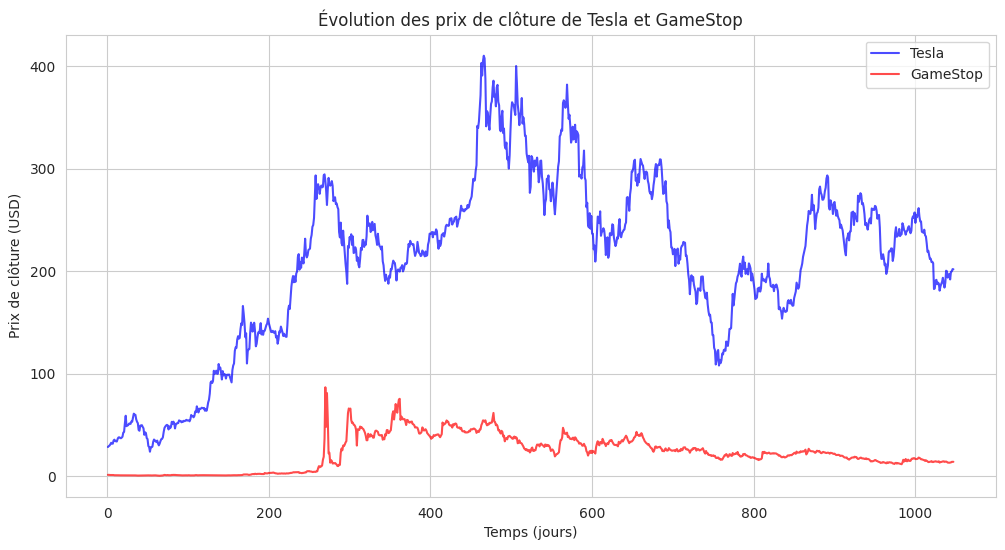

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Définition du style
sns.set_style("whitegrid")

# ✅ Tracer les prix de clôture (Close) sur le temps
plt.figure(figsize=(12, 6))
plt.plot(tesla_data["Close"], label="Tesla", color="blue", alpha=0.7)
plt.plot(gamestop_data["Close"], label="GameStop", color="red", alpha=0.7)
plt.title("Évolution des prix de clôture de Tesla et GameStop")
plt.xlabel("Temps (jours)")
plt.ylabel("Prix de clôture (USD)")
plt.legend()
plt.show()


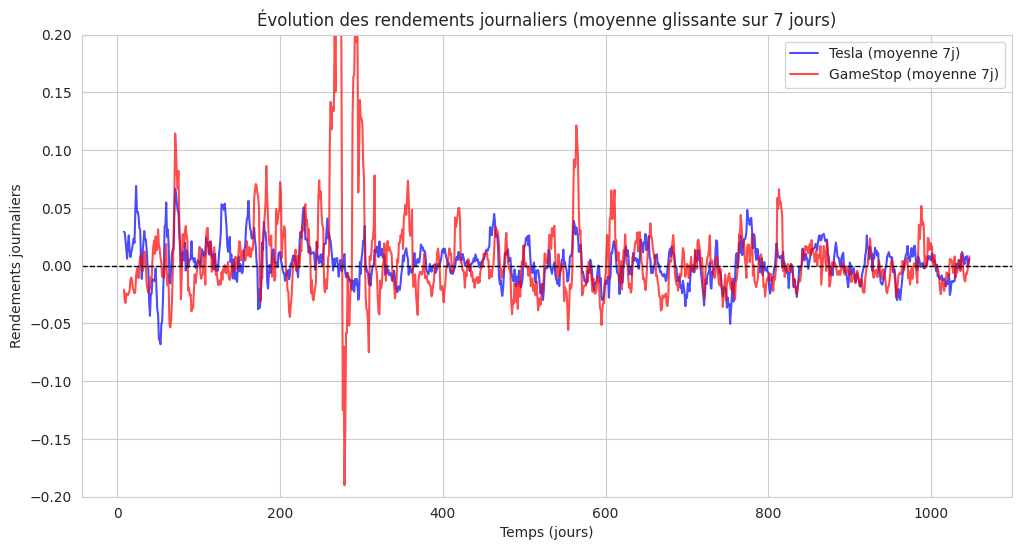

In [31]:
import matplotlib.pyplot as plt

# ✅ Appliquer une moyenne mobile sur 7 jours pour lisser les rendements
tesla_data["Returns_Smoothed"] = tesla_data["Returns"].rolling(window=7).mean()
gamestop_data["Returns_Smoothed"] = gamestop_data["Returns"].rolling(window=7).mean()

# ✅ Tracer les rendements journaliers lissés
plt.figure(figsize=(12, 6))
plt.plot(tesla_data["Returns_Smoothed"], label="Tesla (moyenne 7j)", color="blue", alpha=0.7)
plt.plot(gamestop_data["Returns_Smoothed"], label="GameStop (moyenne 7j)", color="red", alpha=0.7)

# ✅ Ajouter une ligne horizontale à y=0 pour mieux voir les variations
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)

# ✅ Ajouter les titres et labels
plt.title("Évolution des rendements journaliers (moyenne glissante sur 7 jours)")
plt.xlabel("Temps (jours)")
plt.ylabel("Rendements journaliers")

# ✅ Ajuster les limites de l'axe Y si nécessaire
plt.ylim(-0.2, 0.2)  # Change cette valeur si besoin pour mieux voir les variations

# ✅ Ajouter une légende
plt.legend()

# ✅ Afficher le graphique
plt.show()



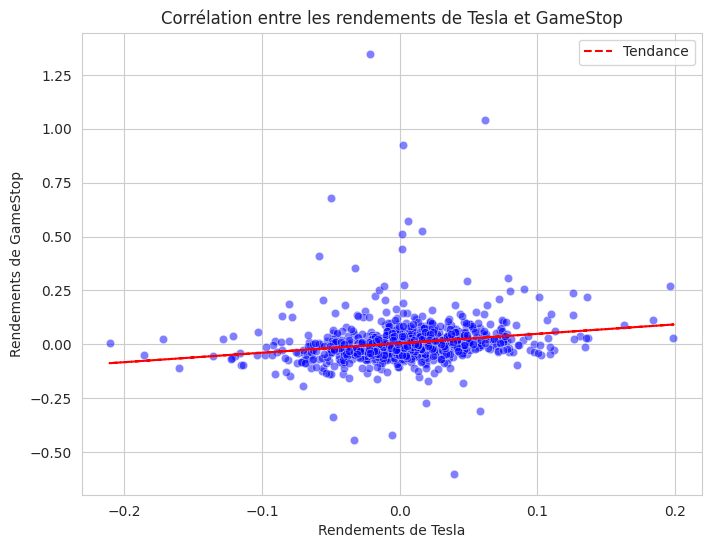

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Ajuster le style
sns.set_style("whitegrid")

# ✅ Tracer un scatter plot avec une droite de tendance
plt.figure(figsize=(8, 6))

# Nuage de points
sns.scatterplot(x=tesla_data["Returns"], y=gamestop_data["Returns"], alpha=0.5, color="blue")

# Ajouter une droite de tendance
m, b = np.polyfit(tesla_data["Returns"].dropna(), gamestop_data["Returns"].dropna(), 1)
plt.plot(tesla_data["Returns"], m * tesla_data["Returns"] + b, color="red", linestyle="dashed", label="Tendance")

# ✅ Titres et labels
plt.title("Corrélation entre les rendements de Tesla et GameStop")
plt.xlabel("Rendements de Tesla")
plt.ylabel("Rendements de GameStop")
plt.legend()
plt.show()



In [34]:
import pandas as pd
import scipy.stats as stats

# 📌 Calculer les statistiques des rendements
stats_df = pd.DataFrame({
    "Statistic": ["Mean", "Standard Deviation", "Skewness", "Kurtosis"],
    "Tesla": [
        tesla_data["Returns"].mean(),
        tesla_data["Returns"].std(),
        stats.skew(tesla_data["Returns"].dropna()),
        stats.kurtosis(tesla_data["Returns"].dropna())
    ],
    "GameStop": [
        gamestop_data["Returns"].mean(),
        gamestop_data["Returns"].std(),
        stats.skew(gamestop_data["Returns"].dropna()),
        stats.kurtosis(gamestop_data["Returns"].dropna())
    ]
})

# 📌 Afficher les résultats
print("\n📊 Statistiques des rendements :")
print(stats_df)



📊 Statistiques des rendements :
            Statistic     Tesla   GameStop
0                Mean  0.002768   0.006263
1  Standard Deviation  0.042459   0.099381
2            Skewness  0.070128   4.838747
3            Kurtosis  2.929603  55.466099


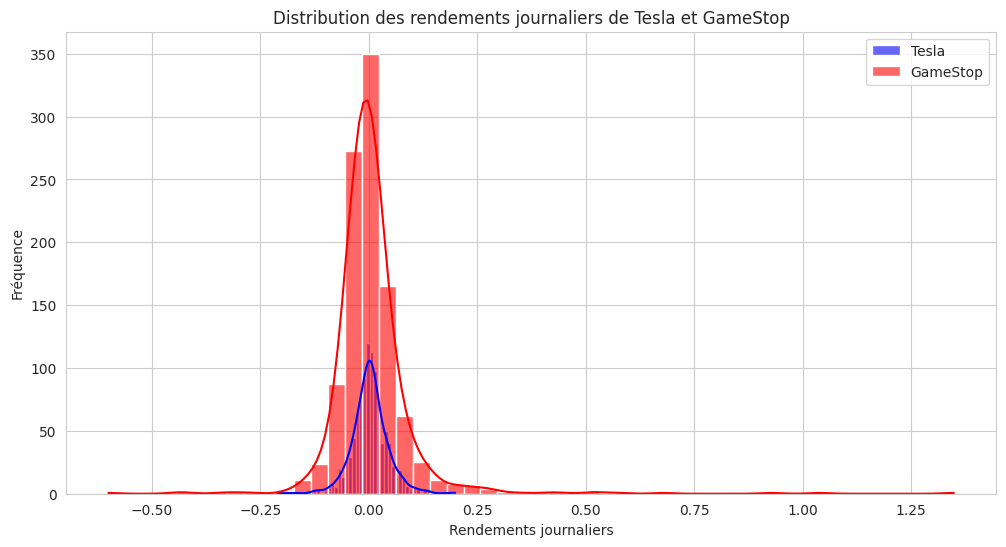

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Tracer les histogrammes et courbes de densité des rendements
plt.figure(figsize=(12, 6))

sns.histplot(tesla_data["Returns"].dropna(), bins=50, kde=True, color="blue", label="Tesla", alpha=0.6)
sns.histplot(gamestop_data["Returns"].dropna(), bins=50, kde=True, color="red", label="GameStop", alpha=0.6)

plt.title("Distribution des rendements journaliers de Tesla et GameStop")
plt.xlabel("Rendements journaliers")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()


In [36]:
from scipy.stats import shapiro, anderson, kstest, norm

# ✅ Fonction pour tester la normalité
def test_normality(data, name):
    print(f"\n📊 Normality tests for {name} Returns:")

    # Shapiro-Wilk Test
    stat, p = shapiro(data)
    print(f"Shapiro-Wilk Test: W = {stat:.4f}, p-value = {p:.4e}")

    # Anderson-Darling Test
    result = anderson(data, dist='norm')
    print(f"Anderson-Darling Test: A² = {result.statistic:.4f}")
    print("Critical Values & Significance Levels:")
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        print(f"  {sl:.1f}%: {cv:.4f} (Reject H0 if A² > {cv})")

    # Kolmogorov-Smirnov Test
    stat, p = kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: D = {stat:.4f}, p-value = {p:.4e}")

# ✅ Appliquer les tests de normalité aux rendements
test_normality(tesla_data["Returns"].dropna(), "Tesla")
test_normality(gamestop_data["Returns"].dropna(), "GameStop")



📊 Normality tests for Tesla Returns:
Shapiro-Wilk Test: W = 0.9631, p-value = 1.2816e-15
Anderson-Darling Test: A² = 9.0712
Critical Values & Significance Levels:
  15.0%: 0.5740 (Reject H0 if A² > 0.574)
  10.0%: 0.6540 (Reject H0 if A² > 0.654)
  5.0%: 0.7840 (Reject H0 if A² > 0.784)
  2.5%: 0.9150 (Reject H0 if A² > 0.915)
  1.0%: 1.0880 (Reject H0 if A² > 1.088)
Kolmogorov-Smirnov Test: D = 0.0712, p-value = 4.6345e-05

📊 Normality tests for GameStop Returns:
Shapiro-Wilk Test: W = 0.6286, p-value = 1.1817e-42
Anderson-Darling Test: A² = 74.3527
Critical Values & Significance Levels:
  15.0%: 0.5740 (Reject H0 if A² > 0.574)
  10.0%: 0.6540 (Reject H0 if A² > 0.654)
  5.0%: 0.7840 (Reject H0 if A² > 0.784)
  2.5%: 0.9150 (Reject H0 if A² > 0.915)
  1.0%: 1.0880 (Reject H0 if A² > 1.088)
Kolmogorov-Smirnov Test: D = 0.1794, p-value = 6.2108e-30


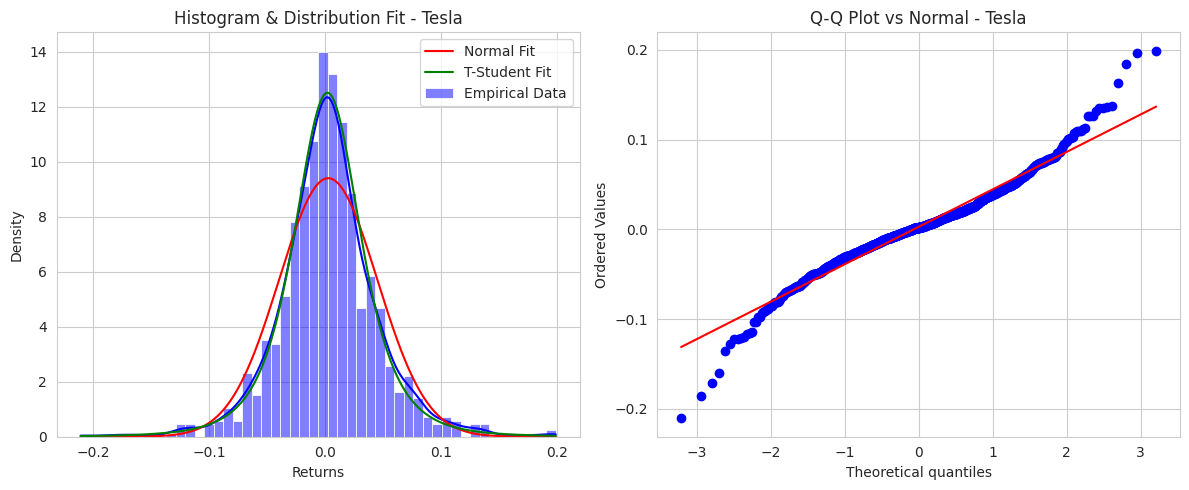

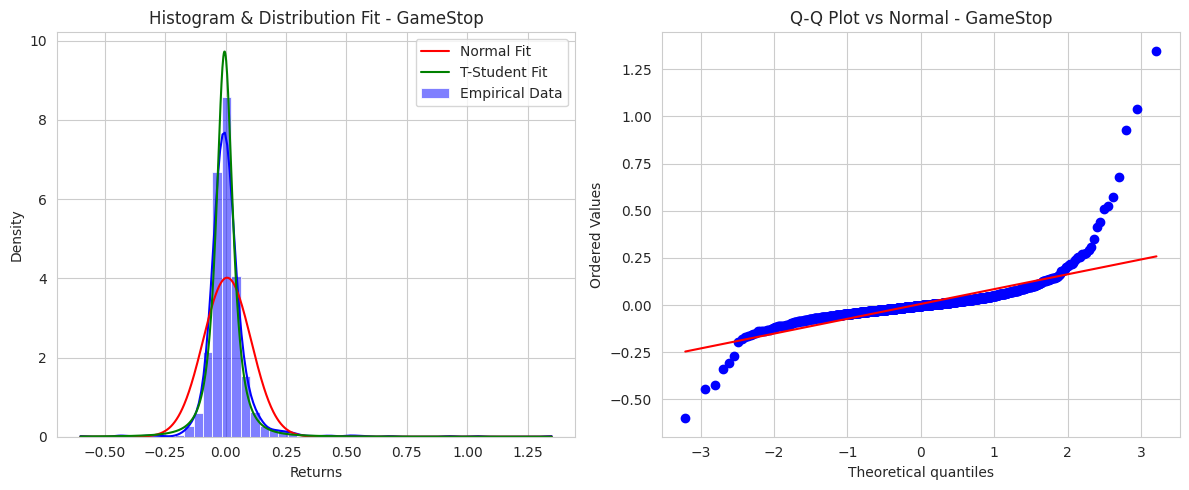

In [38]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour ajuster une distribution et comparer avec la normale
def fit_distribution(data, stock_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Histogramme des rendements avec ajustement d'une distribution normale
    sns.histplot(data, bins=50, kde=True, stat="density", ax=ax[0], color="blue", label="Empirical Data")

    # Ajustement d'une loi normale
    mu, sigma = stats.norm.fit(data)
    x = np.linspace(min(data), max(data), 1000)
    ax[0].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label="Normal Fit")

    # Ajustement d'une loi t-Student
    df, loc, scale = stats.t.fit(data)
    ax[0].plot(x, stats.t.pdf(x, df, loc, scale), 'g-', label="T-Student Fit")

    ax[0].set_title(f"Histogram & Distribution Fit - {stock_name}")
    ax[0].legend()

    # Q-Q Plot pour tester la normalité
    stats.probplot(data, dist="norm", plot=ax[1])
    ax[1].set_title(f"Q-Q Plot vs Normal - {stock_name}")

    plt.tight_layout()
    plt.show()

# Application aux rendements de Tesla et GameStop
fit_distribution(tesla_data["Returns"].dropna(), "Tesla")
fit_distribution(gamestop_data["Returns"].dropna(), "GameStop")



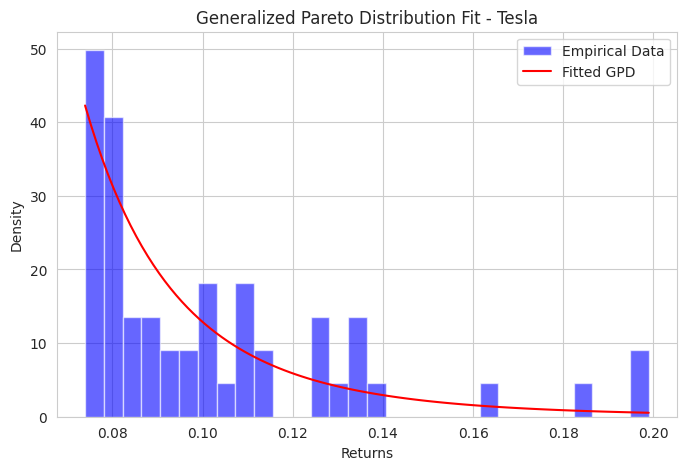

📌 GPD Fit Parameters for Tesla: Shape = 0.1866, Scale = 0.0237


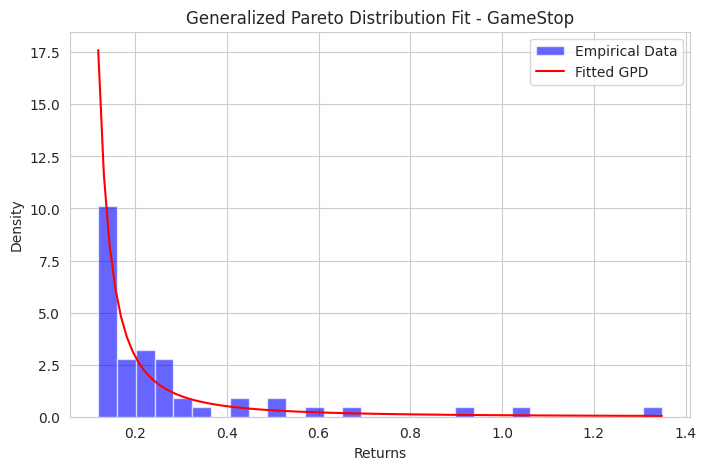

📌 GPD Fit Parameters for GameStop: Shape = 1.1411, Scale = 0.0568


In [39]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def fit_gpd(returns, title, threshold_percentile=95):
    """
    Ajuste une loi de Pareto généralisée (GPD) aux rendements extrêmes.

    Parameters:
        - returns: Série des rendements.
        - title: Nom de l'actif pour le graphique.
        - threshold_percentile: Seuil en percentile pour définir les rendements extrêmes.
    """
    threshold = np.percentile(returns, threshold_percentile)  # Définition du seuil
    extreme_returns = returns[returns > threshold]  # Sélection des valeurs extrêmes

    # Ajustement d'une distribution de Pareto généralisée
    shape, loc, scale = stats.genpareto.fit(extreme_returns - threshold)  # Fit GPD

    # Génération de données ajustées
    x = np.linspace(min(extreme_returns), max(extreme_returns), 100)
    pdf = stats.genpareto.pdf(x - threshold, shape, loc=loc, scale=scale)

    # 📊 Tracé du graphique
    plt.figure(figsize=(8,5))
    plt.hist(extreme_returns, bins=30, density=True, alpha=0.6, color="blue", label="Empirical Data")
    plt.plot(x, pdf, 'r-', label="Fitted GPD")
    plt.title(f"Generalized Pareto Distribution Fit - {title}")
    plt.xlabel("Returns")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    print(f"📌 GPD Fit Parameters for {title}: Shape = {shape:.4f}, Scale = {scale:.4f}")

# Application aux rendements de Tesla et GameStop
fit_gpd(tesla_data["Returns"].dropna(), "Tesla")
fit_gpd(gamestop_data["Returns"].dropna(), "GameStop")


In [41]:
!pip install arch



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001801. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


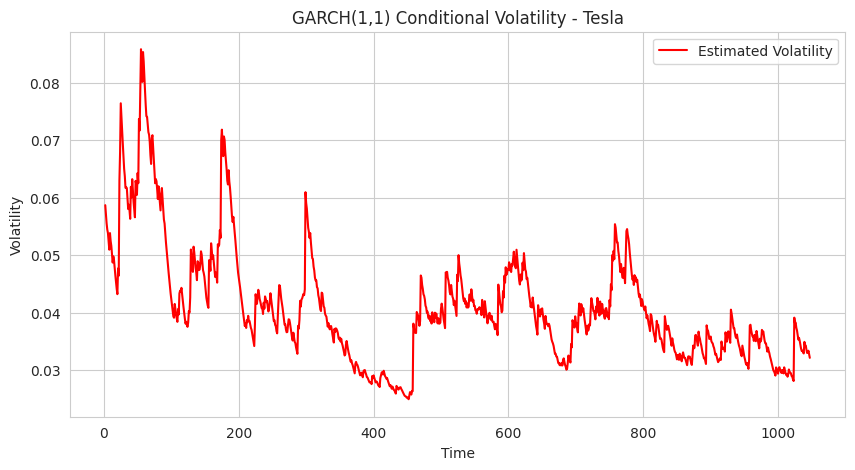

📌 GARCH(1,1) Model Summary for Tesla:

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1887.61
Distribution:                  Normal   AIC:                          -3767.23
Method:            Maximum Likelihood   BIC:                          -3747.42
                                        No. Observations:                 1046
Date:                Fri, Mar 21 2025   Df Residuals:                     1045
Time:                        00:12:40   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.3395e-

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.009867. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


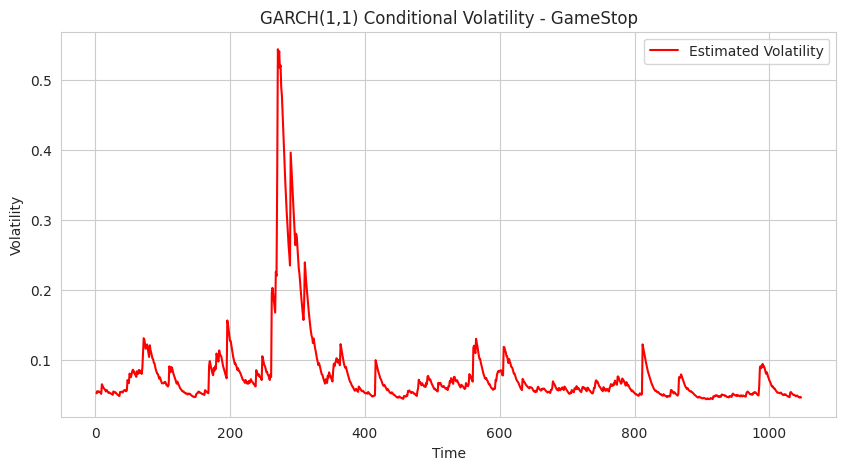

📌 GARCH(1,1) Model Summary for GameStop:

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1341.27
Distribution:                  Normal   AIC:                          -2674.55
Method:            Maximum Likelihood   BIC:                          -2654.73
                                        No. Observations:                 1046
Date:                Fri, Mar 21 2025   Df Residuals:                     1045
Time:                        00:12:41   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu        

In [42]:
from arch import arch_model

def fit_garch(returns, title):
    """
    Ajuste un modèle GARCH(1,1) aux rendements et trace la volatilité conditionnelle.

    Parameters:
        - returns: Série des rendements.
        - title: Nom de l'actif pour le graphique.
    """
    returns = returns.dropna()  # Suppression des valeurs NaN

    # Ajustement du modèle GARCH(1,1)
    model = arch_model(returns, vol="Garch", p=1, q=1, dist="normal")
    results = model.fit(disp="off")  # Estimation du modèle

    # 📈 Récupération de la volatilité conditionnelle estimée
    conditional_vol = results.conditional_volatility

    # 📊 Tracé du graphique
    plt.figure(figsize=(10, 5))
    plt.plot(conditional_vol, color="red", label="Estimated Volatility")
    plt.title(f"GARCH(1,1) Conditional Volatility - {title}")
    plt.xlabel("Time")
    plt.ylabel("Volatility")
    plt.legend()
    plt.show()

    print(f"📌 GARCH(1,1) Model Summary for {title}:\n")
    print(results.summary())

# Application aux rendements de Tesla et GameStop
fit_garch(tesla_data["Returns"], "Tesla")
fit_garch(gamestop_data["Returns"], "GameStop")


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Returns', 'Volatility',
       'Returns_Smoothed'],
      dtype='object')
Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Returns', 'Volatility',
       'Returns_Smoothed'],
      dtype='object')


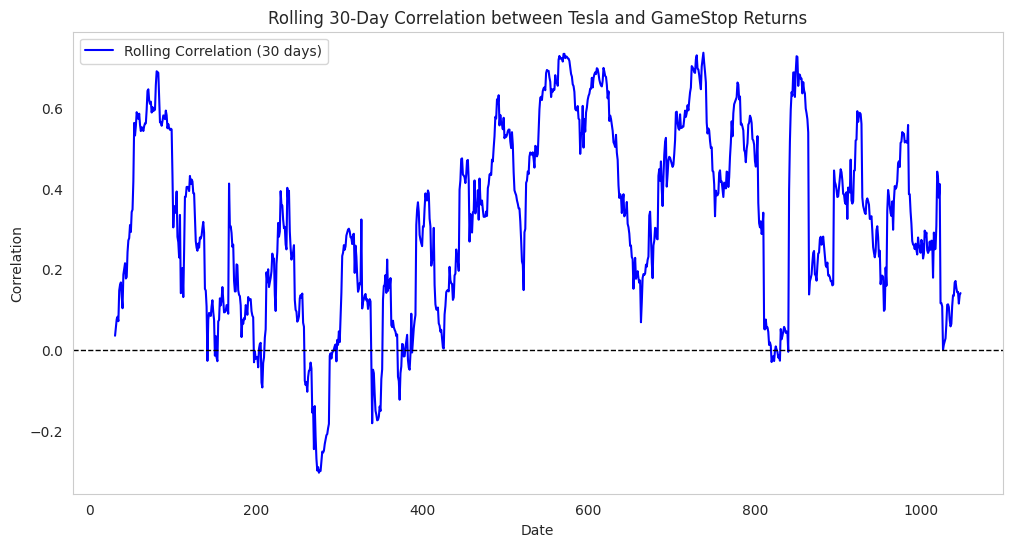

In [44]:
# Vérifier le nom correct du DataFrame GameStop
print(tesla_data.columns)
print(gamestop_data.columns)  # Vérifie si c'est bien 'gamestop_data' et non 'gme_data'

# Calcul de la corrélation mobile sur une fenêtre de 30 jours
rolling_correlation = tesla_data["Returns"].rolling(window=30).corr(gamestop_data["Returns"])

# Tracé de la corrélation mobile
plt.figure(figsize=(12, 6))
plt.plot(rolling_correlation, label="Rolling Correlation (30 days)", color='b')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Ligne de référence à 0
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.title("Rolling 30-Day Correlation between Tesla and GameStop Returns")
plt.legend()
plt.grid()
plt.show()



In [1]:
!pip install folium


In [2]:
import folium

# Créer une carte centrée sur une position (ex: New York)
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Ajouter un marqueur
folium.Marker([40.7128, -74.0060], popup="Tesla Location").add_to(m)
folium.Marker([34.0522, -118.2437], popup="GameStop Location").add_to(m)

# Afficher la carte dans Google Colab
m
